f'(x) = 2 - 2*sin(2*x)
f''(x) = -4*cos(2*x)
f'''(x) = 8*sin(2*x)
f(0) = 1.00000000000000
T(x) = -2.0*x**2 + 2.0*x + 1.0


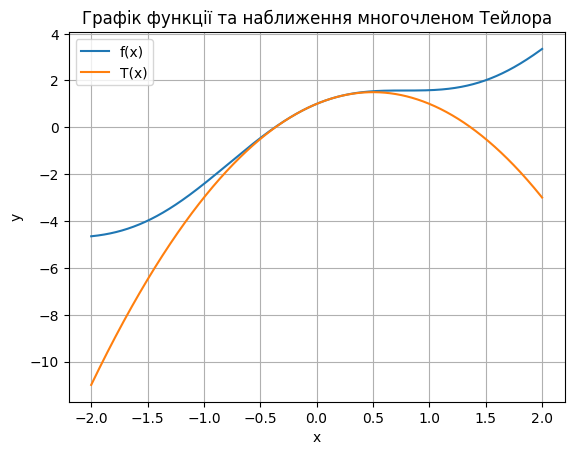

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def find_derivatives(f, x):
    f1 = sp.diff(f, x)
    f2 = sp.diff(f1, x)
    f3 = sp.diff(f2, x)
    return f1, f2, f3

def evaluate_at_point(f, x, x_value):
    return f.subs(x, x_value).evalf()

def taylor_polynomial(f, x, x0, n):
    terms = [f.subs(x, x0).evalf()]
    for i in range(1, n + 1):
        term = sp.diff(f, x, i).subs(x, x0).evalf() / sp.factorial(i)
        terms.append(term * (x - x0)**i)
    return sp.simplify(sp.expand(sum(terms)))

def plot_graphs(x_vals, f_vals, T_vals):
    fig, ax = plt.subplots()
    ax.plot(x_vals, f_vals, label="f(x)")
    ax.plot(x_vals, T_vals, label="T(x)")
    ax.legend()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Графік функції та наближення многочленом Тейлора")
    plt.grid(True)
    plt.show()

def main():
    x = sp.symbols('x')
    f = sp.cos(2*x) + 2 * x

    x0 = 0
    n = 3

    f1, f2, f3 = find_derivatives(f, x)
    f_x0 = evaluate_at_point(f, x, x0)

    T = taylor_polynomial(f, x, x0, n)

    print(f"f'(x) = {f1}")
    print(f"f''(x) = {f2}")
    print(f"f'''(x) = {f3}")

    print(f"f(0) = {f_x0}")
    print(f"T(x) = {T.evalf()}")

    x_vals = np.linspace(-2, 2, 1000)
    f_vals = np.array([evaluate_at_point(f, x, xi) for xi in x_vals])
    T_vals = np.array([T.subs(x, xi).evalf() for xi in x_vals])

    plot_graphs(x_vals, f_vals, T_vals)

if __name__ == "__main__":
    main()
